## Analiza danych english stack exchange

In [1]:
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")
sc.install_pypi_package("pandas==0.25.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1674243240971_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…



You are using pip version 9.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

You are using pip version 9.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
click (8.1.1)
cycler (0.11.0)
docutils (0.14)
jmespath (1.0.0)
joblib (1.1.0)
kiwisolver (1.4.4)
lockfile (0.11.0)
lxml (4.8.0)
matplotlib (3.1.1)
mysqlclient (1.4.2)
nltk (3.7)
nose (1.3.4)
numpy (1.20.0)
pandas (0.25.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.9)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2022.1)
PyYAML (5.4.1)
regex (2021.11.10)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.63.1)
typing-extensions (4.4.0)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [3]:
import pyspark.sql.functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("english_stack_exchange_analysis").getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df_posts = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/posts.parquet")
df_tags = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/tags.parquet")
df_users = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/users.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### liczba postow na przestrzeni czasu

In [7]:
df_posts_history = df_posts.groupBy(F.to_date("creation_date").alias("creation_date")).count().orderBy(F.col("creation_date").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [163]:
df_posts = df_posts.withColumn("creation_date_month", F.trunc("creation_date", "month"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [164]:
df_posts_history_monthly = df_posts.groupBy(F.to_date("creation_date_month").alias("creation_date_month")).count().orderBy(F.col("creation_date_month").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [169]:
pd_df_posts_history_monthly = df_posts_history_monthly.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

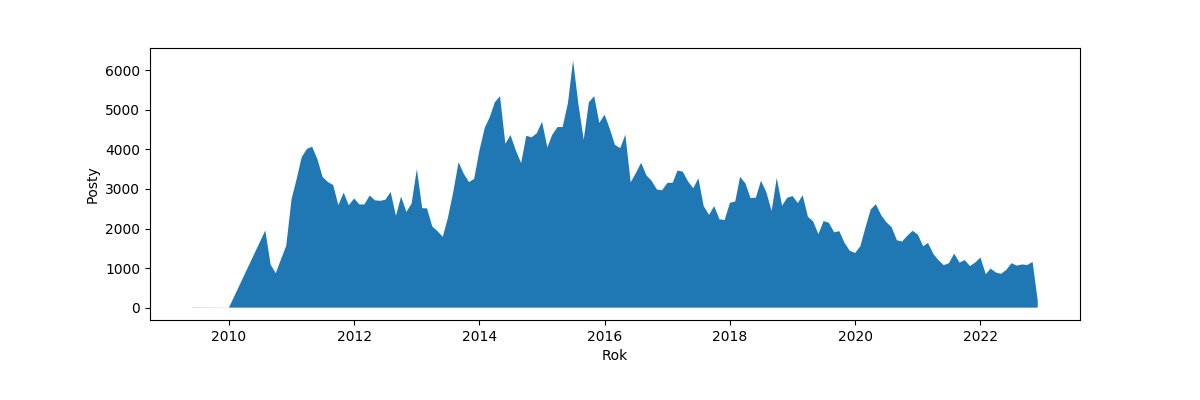

In [191]:
posts = pd_df_posts_history_monthly["count"]
labels = pd_df_posts_history_monthly["creation_date_month"]

plt.clf()
plt.fill_between(labels, posts)
fig = plt.gcf()
fig.set_size_inches(12, 4)
Size = fig.get_size_inches()
# plt.title('Posty na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Posty')
%matplot plt

#### top 15 tagow

In [146]:
df_tags_top = df_tags.orderBy(F.col("count").desc()).limit(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [147]:
df_tags_top.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------------------+-----+---------------+------------+
| id|            tag_name|count|excerpt_post_id|wiki_post_id|
+---+--------------------+-----+---------------+------------+
|326|single-word-requests|19971|          14097|       14096|
| 54|             meaning|16544|           3294|        3293|
|  7|             grammar|13661|          14043|       14042|
|125|         word-choice|11205|          14099|       14098|
|658|          word-usage| 6772|          31769|       31768|
|344|      grammaticality| 6073|          11093|       11092|
|  2|           etymology| 5772|           2880|        2879|
|334|             phrases| 5650|          13025|       13024|
|297|         expressions| 5620|          18219|       18218|
|651|     phrase-requests| 5320|          33984|       33983|
|648|  meaning-in-context| 4953|          21052|       21051|
|273|               verbs| 4504|           3530|        3529|
|295|              idioms| 4239|          18035|       18034|
|287|   

In [148]:
pd_df_tags_top = df_tags_top["tag_name", "count"].toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

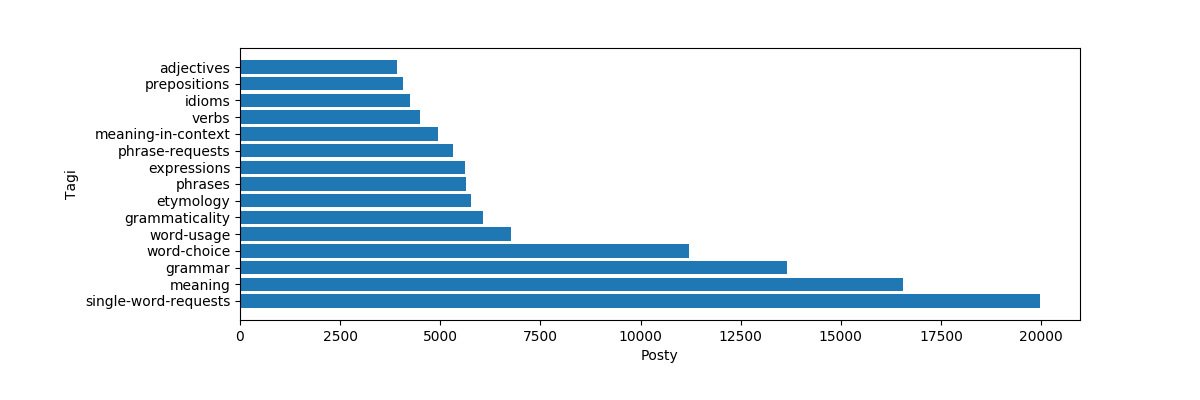

In [192]:
posts = pd_df_tags_top["count"]
labels = pd_df_tags_top["tag_name"]

plt.clf()
plt.barh(labels, posts, align='center')
fig = plt.gcf()
Size = fig.get_size_inches()
# fig.set_size_inches(8, 7, True)
fig.set_size_inches(12, 4)
plt.subplots_adjust(left=0.2)
# plt.title('Historycznie najpopularniejsze tagi - top 15')
plt.xlabel('Posty')
plt.ylabel('Tagi')
%matplot plt

In [15]:
df_posts.show(1, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
df_posts.select('tags', F.split(F.regexp_replace(F.col('tags'), "^<|>$", ""), "><").alias('tags_split')).show(4, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0--------------------------------------------------------------------
 tags       | null                                                           
 tags_split | null                                                           
-RECORD 1--------------------------------------------------------------------
 tags       | <meaning><phrases><expressions><phrase-requests><phrase-usage> 
 tags_split | [meaning, phrases, expressions, phrase-requests, phrase-usage] 
-RECORD 2--------------------------------------------------------------------
 tags       | null                                                           
 tags_split | null                                                           
-RECORD 3--------------------------------------------------------------------
 tags       | <grammar><pronouns><whom><who>                                 
 tags_split | [grammar, pronouns, whom, who]                                 
only showing top 4 rows

In [34]:
df_posts = df_posts.withColumn("tags_split", F.split(F.regexp_replace(F.col('tags'), "^<|>$", ""), "><"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
df_posts.show(2, vertical=True, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [36]:
exploded_posts_tags = df_posts.select(F.to_date("creation_date").alias("creation_date"), F.explode("tags_split").alias("tag")).groupBy(F.col("creation_date"), F.col("tag")).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
top_tags_list = [i[0] for i in df_tags_top.select("tag_name").collect()]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
top_tag_posts = exploded_posts_tags.filter(F.col("tag").isin(top_tags_list)).orderBy(F.col("creation_date").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
top_tag_posts.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+--------------------+-----+
|creation_date|                 tag|count|
+-------------+--------------------+-----+
|   2022-12-04|single-word-requests|    1|
|   2022-12-04|             meaning|    1|
|   2022-12-04|          word-usage|    1|
|   2022-12-04|             grammar|    4|
|   2022-12-03|single-word-requests|    3|
|   2022-12-03|          word-usage|    1|
|   2022-12-03|             grammar|    5|
|   2022-12-03|             meaning|    2|
|   2022-12-03|         word-choice|    1|
|   2022-12-02|single-word-requests|    2|
|   2022-12-02|             grammar|    4|
|   2022-12-02|          word-usage|    2|
|   2022-12-02|             meaning|    2|
|   2022-12-01|             meaning|    5|
|   2022-12-01|             grammar|    2|
|   2022-12-01|single-word-requests|    1|
|   2022-12-01|         word-choice|    2|
|   2022-11-30|             grammar|    3|
|   2022-11-30|single-word-requests|    3|
|   2022-11-30|          word-usage|    1|
+----------

In [40]:
top_tag_posts.groupBy("tag").sum("count").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+
|                 tag|sum(count)|
+--------------------+----------+
|          word-usage|      6772|
|single-word-requests|     19971|
|         word-choice|     11205|
|             meaning|     16544|
|             grammar|     13661|
+--------------------+----------+

In [42]:
df_posts.select("tags_split", "id").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+
|          tags_split|    id|
+--------------------+------+
|                null|542512|
|[meaning, phrases...|542513|
|                null|542514|
|[grammar, pronoun...|542515|
|                null|542516|
|                null|542517|
|                null|542518|
|[etymology, old-e...|542519|
|                null|542520|
|      [speech, tone]|542521|
|[syntactic-analys...|542523|
|                null|542524|
|             [story]|542525|
|[single-word-requ...|542526|
|[meaning, literat...|542527|
|                null|542528|
|                null|542529|
|[nouns, gerunds, ...|542530|
|                null|542531|
|[idioms, dictiona...|542532|
+--------------------+------+
only showing top 20 rows

In [43]:
df_tags.orderBy(F.col("count").desc()).show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------------------+-----+---------------+------------+
| id|            tag_name|count|excerpt_post_id|wiki_post_id|
+---+--------------------+-----+---------------+------------+
|326|single-word-requests|19971|          14097|       14096|
| 54|             meaning|16544|           3294|        3293|
|  7|             grammar|13661|          14043|       14042|
|125|         word-choice|11205|          14099|       14098|
|658|          word-usage| 6772|          31769|       31768|
|344|      grammaticality| 6073|          11093|       11092|
|  2|           etymology| 5772|           2880|        2879|
|334|             phrases| 5650|          13025|       13024|
|297|         expressions| 5620|          18219|       18218|
|651|     phrase-requests| 5320|          33984|       33983|
|648|  meaning-in-context| 4953|          21052|       21051|
|273|               verbs| 4504|           3530|        3529|
|295|              idioms| 4239|          18035|       18034|
|287|   

In [44]:
pd_df_top_tag_posts = top_tag_posts.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
top_tag_posts.select(F.col("creation_date"), F.col("tag")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+--------------------+
|creation_date|                 tag|
+-------------+--------------------+
|   2022-12-04|single-word-requests|
|   2022-12-04|          word-usage|
|   2022-12-04|             grammar|
|   2022-12-04|             meaning|
|   2022-12-03|             grammar|
|   2022-12-03|             meaning|
|   2022-12-03|single-word-requests|
|   2022-12-03|          word-usage|
|   2022-12-03|         word-choice|
|   2022-12-02|          word-usage|
|   2022-12-02|             meaning|
|   2022-12-02|             grammar|
|   2022-12-02|single-word-requests|
|   2022-12-01|single-word-requests|
|   2022-12-01|             meaning|
|   2022-12-01|         word-choice|
|   2022-12-01|             grammar|
|   2022-11-30|             grammar|
|   2022-11-30|          word-usage|
|   2022-11-30|single-word-requests|
+-------------+--------------------+
only showing top 20 rows

In [46]:
top_tag_posts = top_tag_posts.withColumn("creation_year", F.year(F.col("creation_date")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [98]:
pd_pivoted_top_tag_posts = top_tag_posts.groupBy(F.col("creation_year")).pivot("tag").sum("count").sort(F.col("creation_year").asc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
pd_pivoted_top_tag_posts.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['creation_year', 'grammar', 'meaning', 'single-word-requests',
       'word-choice', 'word-usage'],
      dtype='object')

In [63]:
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

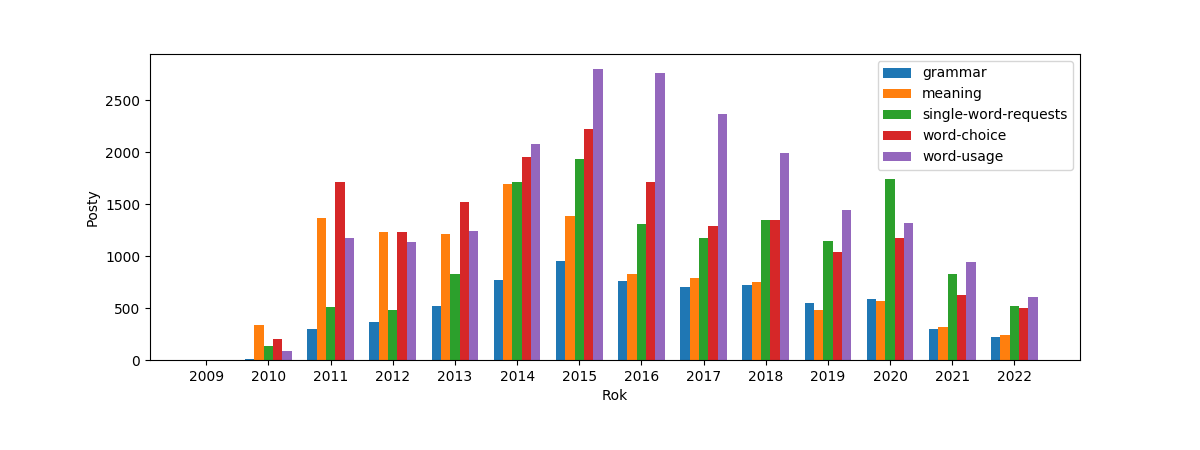

In [193]:
plt.clf()

labels = pd_pivoted_top_tag_posts['creation_year']
grammar = pd_pivoted_top_tag_posts['grammar']
meaning = pd_pivoted_top_tag_posts['meaning']
single_word_requests = pd_pivoted_top_tag_posts['single-word-requests']
word_choice = pd_pivoted_top_tag_posts['word-choice']
word_usage = pd_pivoted_top_tag_posts['word-usage']


x = np.arange(len(labels))

width = 0.15

fig, ax = plt.subplots()

rects1 = ax.bar(x - 0.3, pd_pivoted_top_tag_posts['word-usage'], width, label='word-usage')
rects2 = ax.bar(x - 0.15, pd_pivoted_top_tag_posts['word-choice'], width, label='word-choice')
rects3 = ax.bar(x, pd_pivoted_top_tag_posts['grammar'], width, label='grammar')
rects4 = ax.bar(x + 0.15, pd_pivoted_top_tag_posts['meaning'], width, label='meaning')
rects5 = ax.bar(x + 0.3, pd_pivoted_top_tag_posts['single-word-requests'], width, label='single-word-requests')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(["grammar", "meaning", "single-word-requests", "word-choice", "word-usage"])
fig.set_size_inches(12, 4.5)
plt.subplots_adjust(bottom=0.2)
# plt.title('Posty na przestrzeni lat w przekroju na najpopularniejsze tagi - top 5')
plt.xlabel('Rok')
plt.ylabel('Posty')
%matplot plt

#### lokalizacja

In [233]:
df_users = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/users.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
df_users.select(F.split("location", ",")[-1]).show()

#### czas na forum

In [216]:
df_users = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/users.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [217]:
df_users.show(3, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 id                | -1                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [218]:
df_users = df_users.withColumn("time_on_forum_in_seconds", F.col("last_access_date").cast("long") - F.col("creation_date").cast("long"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [232]:
df_users.select("reputation", "location", "creation_date", "last_access_date").orderBy(F.col("time_on_forum_in_seconds").desc()).show(truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------
 reputation       | 27152                          
 location         | null                           
 creation_date    | 2010-08-05 21:58:50.197        
 last_access_date | 2022-12-01 04:46:18.413        
-RECORD 1------------------------------------------
 reputation       | 6213                           
 location         | United Kingdom                 
 creation_date    | 2010-08-13 08:16:01.983        
 last_access_date | 2022-12-04 11:58:55.563        
-RECORD 2------------------------------------------
 reputation       | 3521                           
 location         | Gråsten, Denmark               
 creation_date    | 2010-08-12 23:14:05.12         
 last_access_date | 2022-12-02 16:38:16.5          
-RECORD 3------------------------------------------
 reputation       | 101                            
 location         | Bangkok Thailand               
 creation_date    | 2010-08-13 22:11:07.72         
 last_access

#### najwyzej i najnizej oceniane pytania

In [194]:
df_posts = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/posts.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [230]:
df_posts.select("title", "score", "tags").filter(F.col("post_type_id") == 1).sort(F.col("score").desc()).show(10, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0----------------------------------------------------------------------------------------
 title | How do you quote a passage that has used '[sic]' mistakenly?                            
 score | 620                                                                                     
 tags  | <punctuation><quotations>                                                               
-RECORD 1----------------------------------------------------------------------------------------
 title | Did English ever have a formal version of "you"?                                        
 score | 432                                                                                     
 tags  | <etymology><pronouns><formality><personal-pronouns><thou-thee-thy>                      
-RECORD 2----------------------------------------------------------------------------------------
 title | Which word begins with "y" and looks like an axe in this picture?                       
 score | 426        

In [228]:
df_posts.select("title", "score").filter(F.col("post_type_id") == 1).sort(F.col("score").asc()).show(15, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0---------------------------------------------------------------------------------------
 title | How to comprehend the phrase "put them in affluent group of people"                    
 score | -11                                                                                    
-RECORD 1---------------------------------------------------------------------------------------
 title | Word for “Woman Who Hates Men”                                                         
 score | -10                                                                                    
-RECORD 2---------------------------------------------------------------------------------------
 title | Why does English have so few "obscene" roots, compared to Russian?                     
 score | -10                                                                                    
-RECORD 3---------------------------------------------------------------------------------------
 title | On the subject of "br

#### historycznie najpopularniejsze pytania (najwięcej wyświetleń)

In [226]:
df_posts.select("title", "view_count", "tags").filter(F.col("post_type_id") == 1).sort(F.col("view_count").desc()).show(10, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------------------------------------------------------------------------
 title      | What is the *best* way to express that an email contains an attachment?                                
 view_count | 2313084                                                                                                
 tags       | <formality><email>                                                                                     
-RECORD 1------------------------------------------------------------------------------------------------------------
 title      | Is it "bear" or "bare" with me?                                                                        
 view_count | 1862608                                                                                                
 tags       | <word-choice><homophones>                                                                              
-RECORD 2-----------------------------------------------

#### zaakceptowane vs niezaakceptowane

In [201]:
df_posts.filter((F.col("post_type_id") == 1) & F.col("accepted_answer_id").isNull()).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

66329

In [202]:
df_posts.filter((F.col("post_type_id") == 1) & F.col("accepted_answer_id").isNotNull()).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

60801

In [203]:
df_posts.filter((F.col("post_type_id") == 1)).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

127130